In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt


In [7]:
file_path = r'C:\Users\Rifat\Documents\aqi data.csv'  # Replace this with the actual path
data = pd.read_csv(file_path)

In [8]:
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d/%m/%Y %H:%M')

In [9]:
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['DayOfWeek'] = data['DateTime'].dt.dayofweek

In [10]:
data = data.drop(columns=['DateTime'])

In [11]:
X = data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek']]
y = data['AQI']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [15]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 19.06


In [17]:
future_dates = pd.date_range(start="1/1/2030", end="12/31/2030 23:00", freq='h')  # Hourly intervals for 2030
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Hour': future_dates.hour,
    'Minute': 0,  # Assuming minute = 0 for simplicity
    'DayOfWeek': future_dates.dayofweek
})

In [18]:
future_predictions = model.predict(future_data)

In [19]:
future_data['Predicted_AQI'] = future_predictions

In [20]:
print(future_data.head())


   Year  Month  Day  Hour  Minute  DayOfWeek  Predicted_AQI
0  2030      1    1     0       0          1         329.99
1  2030      1    1     1       0          1         337.97
2  2030      1    1     2       0          1         328.45
3  2030      1    1     3       0          1         283.63
4  2030      1    1     4       0          1         273.23


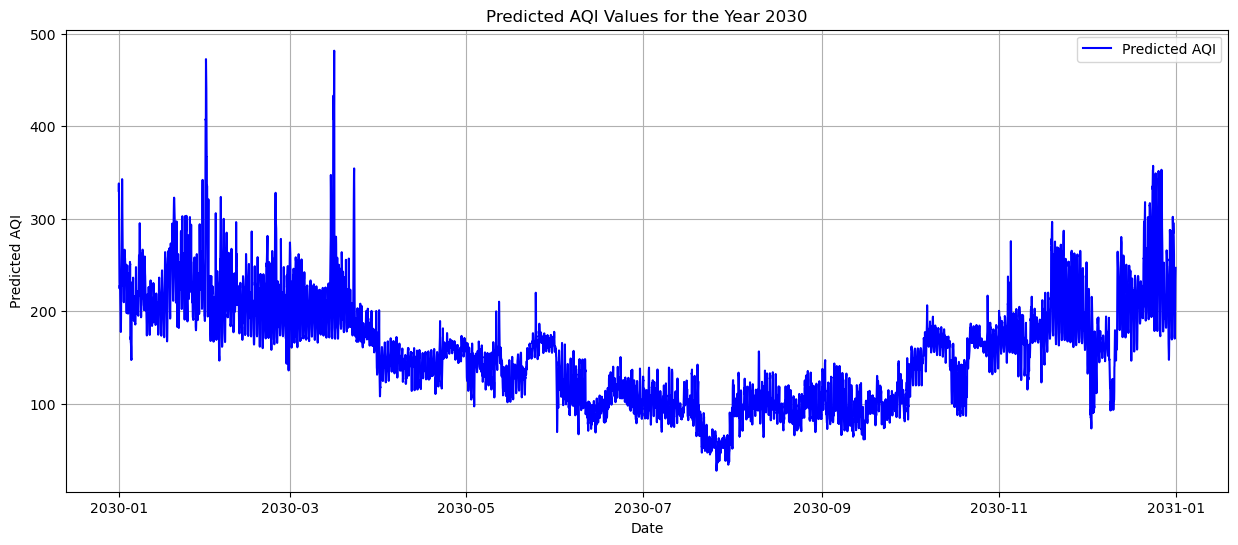

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(future_dates, future_predictions, color='blue', label='Predicted AQI')
plt.xlabel('Date')
plt.ylabel('Predicted AQI')
plt.title('Predicted AQI Values for the Year 2030')
plt.legend()
plt.grid()
plt.show()


In [22]:
future_data_2030 = future_data[future_data['Year'] == 2030]

In [23]:
monthly_predictions_2030 = future_data_2030.groupby('Month')['Predicted_AQI'].mean().reset_index()


In [24]:
print("Predicted monthly average AQI for 2030:")
print(monthly_predictions_2030)

Predicted monthly average AQI for 2030:
    Month  Predicted_AQI
0       1     229.360524
1       2     212.305446
2       3     202.967124
3       4     146.889736
4       5     145.500430
5       6     108.213236
6       7      83.803266
7       8      98.179207
8       9      99.339653
9      10     154.072392
10     11     192.366417
11     12     204.369825
